# Sarcasm Text Detection

This notebook looks into using Python-based ML and Data Science libraries in an attempt to build a ML model capable of detecting whether sarcasm is present in a new headline.

## 1. Problem Definition
Can you identify sarcastic sentences? Can you distinguish between fake news and legitimate news?

## 2. Data
This News Headlines dataset for Sarcasm Detection is collected from two news website, TheOnion and HuffPost.

Available at https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not sarcasm is present in a new headline during the proof of concept, we will pursue the project.

## 4. Features
Each record consists of three attributes:
* `is_sarcastic`: 1 if the record is sarcastic otherwise 0
* `headline`: the headline of the news article
* `article_link`: link to the original news article. Useful in collecting supplementary data



## Code Functions


In [ ]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback



In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


## Visualising a text dataset

In [ ]:
import pandas as pd
df = pd.read_json("/content/drive/MyDrive/sarcasm_detector/Sarcasm_Headlines_Dataset.json", lines=True)
dfv2 = pd.read_json("/content/drive/MyDrive/sarcasm_detector/Sarcasm_Headlines_Dataset_v2.json", lines=True)
train_df=pd.concat([df,dfv2])
train_df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,article_link,headline,is_sarcastic
25962,https://www.huffingtonpost.com/entry/stephen-c...,stephen colbert reveals the back-up slogans fo...,0
273,https://politics.theonion.com/hooded-members-o...,hooded members of congress drown another love ...,1
6087,https://local.theonion.com/man-knows-he-must-r...,man knows he must ride unexpected urge to clea...,1
24057,https://www.theonion.com/area-family-awakes-to...,area family awakes to find michelle obama tend...,1
26448,https://www.huffingtonpost.com/entry/james-cor...,james corden and harry styles kiss for holiday...,0


In [ ]:
# How many examples of each class?
train_df.is_sarcastic.value_counts()

0    29970
1    25358
Name: is_sarcastic, dtype: int64

In [ ]:
# How many total samples?
len(train_df)

55328

In [ ]:
# Let's visualise some random training samples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["headline", "is_sarcastic"]][random_index:random_index+5].itertuples():
  _, headline, is_sarcastic = row
  print(f"Target: {is_sarcastic}", "(Sarcastic)" if is_sarcastic > 0 else "(not Sarcastic)")
  print(f"headline:\n{headline}\n")
  print("---\n")

Target: 1 (Sarcastic)
headline:
members of u2 to stare in different directions

---

Target: 1 (Sarcastic)
headline:
fisher-price releases new in utero fetal activity gym

---

Target: 1 (Sarcastic)
headline:
christian bale glad to be done with most humiliating experience of professional life

---

Target: 0 (not Sarcastic)
headline:
donald glover's 'this is america,' through the eyes of a jim crow historian

---

Target: 1 (Sarcastic)
headline:
family wishes dad could find healthier way to express emotions than bursting into full-blown musical number

---



## Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["headline"].to_numpy(),
                                                                            train_df_shuffled["is_sarcastic"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(49795, 5533, 49795, 5533)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(["jake tapper has one-word response to creepy kellyanne conway 'snl' sketch",
        'camera crew discreetly trails overweight woman for obesity segment',
        "bobby brown thanks fans for support during 'rough times'",
        'alia shawkat is feeling herself',
        "2012 seniors thunder into high school's parking lot like coalition forces entering baghdad",
        'will tax reform close the gaps?',
        'renamed arena will always be verizon wireless amphitheater to locals',
        'latest department of interior river count comes up one short',
        'cnn accused of ignoring certain issues on anderson cooper 340°',
        "a labor day documentary: 'brothers on the line' tells the story of the reuther brothers -- founding fathers of the american middle class"],
       dtype=object), array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0]))

## Converting text into numbers
When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert text to numbers.

There are a few ways to do this, namely:
* Tokenisation - direct mapping of token (a token could be a word or a character) to numbers.
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learnt).

### Text Vectorization (Tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

10

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenise it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 690,    7, 4435,    5,   76,  522,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenizer it
random_sentence=random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 olympic skier ashley caldwell's snooze button habit is so relatable        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1145,    1, 4277,    1, 8584, 3417, 3139,   11,  103, 9965,    0,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # get all of the unique words in out training data
top_5_words = words_in_vocab[:5] # the most common words in the vocab
bottom_5_words = words_in_vocab[-5:] # the least common words in the vocab
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab: {bottom_5_words}")

Number of words in vocab: 10000
Most common words in vocab: ['', '[UNK]', 'to', 'of', 'the']
Least common words in vocab: ['puddle', 'publicists', 'pub', 'psychopath', 'proximity']


### Create an Embedding using an Embedding Layer

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # output shape
                             embeddings_initializer="uniform",
                             input_length=max_length # how long is each input
                             )
embedding

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 you can train your brain to make smarter money decisions. here's how        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00230019,  0.01280196, -0.0236063 , ..., -0.00712721,
         -0.00366957, -0.03328179],
        [-0.04130096, -0.03505038,  0.02192307, ..., -0.03035457,
         -0.04614954, -0.04982979],
        [-0.02261202, -0.02314808, -0.00379343, ...,  0.02518312,
          0.03604822,  0.04319829],
        ...,
        [ 0.03230062, -0.00723218,  0.02318162, ...,  0.02161166,
         -0.01038497, -0.00698036],
        [ 0.03230062, -0.00723218,  0.02318162, ...,  0.02161166,
         -0.01038497, -0.00698036],
        [ 0.03230062, -0.00723218,  0.02318162, ...,  0.02161166,
         -0.01038497, -0.00698036]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.00230019,  0.01280196, -0.0236063 ,  0.015237  ,  0.0241986 ,
        -0.01818337,  0.01749957,  0.02511121,  0.02656781,  0.00045321,
        -0.03353883,  0.00459538,  0.00706116, -0.03634101,  0.02882909,
         0.00508069,  0.02609039, -0.04723314,  0.03731796, -0.02432874,
        -0.01389412,  0.00697327,  0.02879757,  0.03890655, -0.02110914,
         0.01151971, -0.03837763,  0.00501861, -0.0467907 , -0.00331026,
        -0.01085683,  0.04345628, -0.02385403, -0.02440405,  0.0142838 ,
         0.01354321, -0.02885977,  0.03549841,  0.04021123, -0.03139085,
        -0.04660157,  0.0496047 ,  0.01035718, -0.04640141,  0.02094785,
         0.02796812, -0.03052467, -0.0362823 , -0.00602137,  0.0315926 ,
        -0.02291418, -0.04021698,  0.00294827,  0.03687317, -0.04889364,
         0.00526979, -0.04934825,  0.0476395 , -0.001394  ,  0.01903539,
         0.00699987, -0.01445577, -0.00874039, -0.04453819, -0.03293411,
  

### Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 89.19%


In [ ]:
train_df.is_sarcastic.value_counts()

0    29970
1    25358
Name: is_sarcastic, dtype: int64

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0])

In [ ]:
# Function to evalaute: accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted label in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall and f1-score between y_true and y_pred.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100 # get accuracy score in percentage value
  # Calculate model precision, recall and f1 score using "weighted" avergage
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  # Create a dictionary of model results
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 89.19212000722935,
 'f1': 0.891278369920902,
 'precision': 0.8941406914111836,
 'recall': 0.8919212000722935}

### Model 1: A simple dense model

In [ ]:
# Create a tensorboard callback (need to create a new one for each model)
# from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # condense the feature vector for each token to one vector
outputs = layers.Dense(1, activation="sigmoid")(x) # Create the output layer, want binary outputs so use sigmoid activation function
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20210909-064122
Epoch 1/5
1557/1557 [==============================] - 15s 8ms/step - loss: 0.3830 - accuracy: 0.8384 - val_loss: 0.2821 - val_accuracy: 0.8823
Epoch 2/5
1557/1557 [==============================] - 11s 7ms/step - loss: 0.2165 - accuracy: 0.9174 - val_loss: 0.2522 - val_accuracy: 0.8948
Epoch 3/5
1557/1557 [==============================] - 11s 7ms/step - loss: 0.1685 - accuracy: 0.9367 - val_loss: 0.2465 - val_accuracy: 0.9058
Epoch 4/5
1557/1557 [==============================] - 11s 7ms/step - loss: 0.1412 - accuracy: 0.9487 - val_loss: 0.2524 - val_accuracy: 0.9118
Epoch 5/5
1557/1557 [==============================] - 11s 7ms/step - loss: 0.1237 - accuracy: 0.9562 - val_loss: 0.2557 - val_accuracy: 0.9174


In [ ]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

173/173 [==============================] - 1s 4ms/step - loss: 0.2557 - accuracy: 0.9174


[0.2557174265384674, 0.9174046516418457]

In [ ]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

(5533, 1)

In [ ]:
# Look at the first 10 predictions
model_1_pred_probs[0]

array([0.97609216], dtype=float32)

In [ ]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0.], dtype=float32)>

In [ ]:
# Calculate our model_1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 91.74046629315019,
 'f1': 0.9175193285751525,
 'precision': 0.9183473332160497,
 'recall': 0.9174046629315019}

In [ ]:
baseline_results

{'accuracy': 89.19212000722935,
 'f1': 0.891278369920902,
 'precision': 0.8941406914111836,
 'recall': 0.8919212000722935}

## Visualizing learnt embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'to', 'of', 'the', 'in', 'for', 'a', 'on', 'and'])

In [ ]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# # Get the weight matrix of embedding layer
# # (these are the numerical representations of each token in out training data, which have been learnt for ~5 epochs)
# embed_weights = model_1.get_layer("embedding").get_weights()[0]
# print(embed_weights.shape) # same size as vocab size and embedding dim (output_dim of our embedding layer)

## Recurrent Neural Networks (RNN's)


### Model 2: LSTM

In [ ]:
# Create an LSTM model
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# print(x.shape)
x = layers.LSTM(units=64, return_sequences=True)(x) # when you're stacking RNN cells together, you need set to return_sequences=True
# print(x.shape)
x = layers.LSTM(64)(x)
# print(x.shape)
x = layers.Dense(64, activation="relu")(x)
# print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20210909-064248
Epoch 1/5
1557/1557 [==============================] - 32s 17ms/step - loss: 0.1218 - accuracy: 0.9582 - val_loss: 0.2303 - val_accuracy: 0.9212
Epoch 2/5
1557/1557 [==============================] - 25s 16ms/step - loss: 0.0888 - accuracy: 0.9690 - val_loss: 0.1887 - val_accuracy: 0.9353
Epoch 3/5
1557/1557 [==============================] - 25s 16ms/step - loss: 0.0525 - accuracy: 0.9813 - val_loss: 0.1770 - val_accuracy: 0.9539
Epoch 4/5
1557/1557 [==============================] - 25s 16ms/step - loss: 0.0283 - accuracy: 0.9898 - val_loss: 0.1684 - val_accuracy: 0.9655
Epoch 5/5
1557/1557 [==============================] - 24s 16ms/step - loss: 0.0161 - accuracy: 0.9946 - val_loss: 0.1959 - val_accuracy: 0.9704


In [ ]:
# Make predictions with LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[9.99656200e-01],
       [1.01237163e-01],
       [9.99981403e-01],
       [9.99966860e-01],
       [5.71758173e-05],
       [3.48000904e-04],
       [9.68556269e-05],
       [1.15011106e-04],
       [1.53459492e-04],
       [6.25435205e-05]], dtype=float32)

In [ ]:
# Convert model 2 prebs probs to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(5533,), dtype=float32, numpy=array([1., 0., 1., ..., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 97.03596602204952,
 'f1': 0.9703829707582654,
 'precision': 0.9705919848061932,
 'recall': 0.9703596602204952}

### Model 3: GRU


In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64)(x)
x = layers.GRU(64, return_sequences=True)(x) # if you want to stack layers on top of each other, you need to return_sequences=True
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 64)            33024     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24960     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20210909-064501
Epoch 1/5
1557/1557 [==============================] - 39s 22ms/step - loss: 0.0524 - accuracy: 0.9834 - val_loss: 0.1498 - val_accuracy: 0.9702
Epoch 2/5
1557/1557 [==============================] - 31s 20ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.1724 - val_accuracy: 0.9727
Epoch 3/5
1557/1557 [==============================] - 32s 20ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.1695 - val_accuracy: 0.9731
Epoch 4/5
1557/1557 [==============================] - 32s 20ms/step - loss: 0.0100 - accuracy: 0.9966 - val_loss: 0.1836 - val_accuracy: 0.9704
Epoch 5/5
1557/1557 [==============================] - 31s 20ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1620 - val_accuracy: 0.9705


In [ ]:
# Make some predictions with our GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[9.9747890e-01],
       [1.5772554e-03],
       [9.9956292e-01],
       [9.9965203e-01],
       [3.5574049e-04],
       [4.1271903e-04],
       [1.9433911e-04],
       [2.0655320e-04],
       [2.7617658e-04],
       [1.7434821e-04]], dtype=float32)

In [ ]:
# Convert model 3 pred probs to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# Calculate model 3 results
# val_labels.shape, model_3_preds.shape
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 97.05403939996386,
 'f1': 0.9705308769452503,
 'precision': 0.9705444525185639,
 'recall': 0.9705403939996385}

### Model 4: Bidirectional RNN


In [ ]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
print(x.shape)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

(None, 15, 128)


In [ ]:
# Get a summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
___________________________________

In [ ]:
# Compile model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20210909-064750
Epoch 1/5
1557/1557 [==============================] - 50s 27ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.1645 - val_accuracy: 0.9733
Epoch 2/5
1557/1557 [==============================] - 40s 26ms/step - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.1864 - val_accuracy: 0.9731
Epoch 3/5
1557/1557 [==============================] - 41s 26ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.2087 - val_accuracy: 0.9745
Epoch 4/5
1557/1557 [==============================] - 40s 26ms/step - loss: 0.0048 - accuracy: 0.9985 - val_loss: 0.1944 - val_accuracy: 0.9734
Epoch 5/5
1557/1557 [==============================] - 41s 26ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.1953 - val_accuracy: 0.9742


In [ ]:
# Make predictions with our bidirectional model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[9.9998176e-01],
       [4.9553658e-03],
       [9.9992394e-01],
       [9.9999058e-01],
       [6.0980354e-05],
       [5.9336911e-05],
       [1.0379659e-04],
       [4.2167876e-04],
       [3.4216275e-05],
       [3.1179305e-05]], dtype=float32)

In [ ]:
# Convert pred probs to pred labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# Calculate the results of our bidirectional model
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 97.4155069582505,
 'f1': 0.9741588064517412,
 'precision': 0.9741677350242788,
 'recall': 0.974155069582505}

### Model 5: Conv1D


In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["This is a test sentence"])) # turn target sequence into embedding
conv_1d = layers.Conv1D(filters=64,
                        kernel_size=5, # this is also referred to as an ngram of 5 (meaning it looks at 5 words at a time)
                        strides=1, # default
                        activation="relu",
                        padding="valid") # default = "valid", the output is smaller than the input shape, "same" means output is same shape as input
conv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # equivalent to "get the most important feature" or "get the feature with the highest value"

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 64]), TensorShape([1, 64]))

In [ ]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210909-065245
Epoch 1/5
1557/1557 [==============================] - 16s 9ms/step - loss: 0.0729 - accuracy: 0.9737 - val_loss: 0.2023 - val_accuracy: 0.9620
Epoch 2/5
1557/1557 [==============================] - 13s 8ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.2322 - val_accuracy: 0.9693
Epoch 3/5
1557/1557 [==============================] - 13s 8ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.3586 - val_accuracy: 0.9682
Epoch 4/5
1557/1557 [==============================] - 13s 8ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.3153 - val_accuracy: 0.9648
Epoch 5/5
1557/1557 [==============================] - 13s 8ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 0.4307 - val_accuracy: 0.9707


In [ ]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[1.0000000e+00],
       [2.6676815e-07],
       [1.0000000e+00],
       [9.9999988e-01],
       [4.5474920e-15],
       [1.8511326e-10],
       [1.0376018e-09],
       [1.1967240e-16],
       [4.3092176e-11],
       [1.1941688e-11]], dtype=float32)

In [ ]:
# Convert model_5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 97.07211277787819,
 'f1': 0.9707026047652578,
 'precision': 0.9707670996534621,
 'recall': 0.9707211277787818}

### Model 6: TensorFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157024  0.0248591   0.0287805  -0.01271502  0.03971543  0.08827759
  0.02680986  0.05589837 -0.01068731 -0.0059729   0.00639324 -0.01819523
  0.00030817  0.09105891  0.05874644 -0.03180627  0.01512476 -0.05162928
  0.00991369 -0.06865346 -0.04209306  0.0267898   0.03011008  0.00321069
 -0.00337969 -0.04787359  0.02266718 -0.00985924 -0.04063614 -0.01292095
 -0.04666384  0.056303   -0.03949255  0.00517685  0.02495828 -0.07014439
  0.02871508  0.04947682 -0.00633971 -0.08960191  0.02807117 -0.00808362
 -0.01360601  0.05998649 -0.10361786 -0.05195372  0.00232955 -0.02332528
 -0.03758105  0.0332773 ], shape=(50,), dtype=float32)


In [ ]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157024,  0.0248591 ,  0.0287805 , ..., -0.00186124,
         0.02315823, -0.01485021],
       [ 0.03596688, -0.08579469, -0.01152742, ..., -0.03414334,
         0.02816023, -0.00878946]], dtype=float32)>

In [ ]:
# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")


In [ ]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
  sentence_encoder_layer,
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210909-065416
Epoch 1/5
1557/1557 [==============================] - 37s 22ms/step - loss: 0.4552 - accuracy: 0.7836 - val_loss: 0.4242 - val_accuracy: 0.8014
Epoch 2/5
1557/1557 [==============================] - 32s 20ms/step - loss: 0.3974 - accuracy: 0.8158 - val_loss: 0.3975 - val_accuracy: 0.8171
Epoch 3/5
1557/1557 [==============================] - 31s 20ms/step - loss: 0.3630 - accuracy: 0.8363 - val_loss: 0.3714 - val_accuracy: 0.8341
Epoch 4/5
1557/1557 [==============================] - 32s 20ms/step - loss: 0.3319 - accuracy: 0.8540 - val_loss: 0.3496 - val_accuracy: 0.8473
Epoch 5/5
1557/1557 [==============================] - 34s 22ms/step - loss: 0.3063 - accuracy: 0.8688 - val_loss: 0.3326 - val_accuracy: 0.8561


In [ ]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 85.61359118019158,
 'f1': 0.85598891622568,
 'precision': 0.8560188381856575,
 'recall': 0.8561359118019157}

### Model 7: TF Hub Pretrained USE but with 10% of training data

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]
len(train_labels_10_percent)

4979

In [ ]:
# Let's build a model the same as model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_8 (Dense)              (None, 64)                32832     
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fit the model to the 10% training data subsets
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20210909-065845
Epoch 1/5
156/156 [==============================] - 10s 49ms/step - loss: 0.6042 - accuracy: 0.6917 - val_loss: 0.5101 - val_accuracy: 0.7622
Epoch 2/5
156/156 [==============================] - 8s 51ms/step - loss: 0.4706 - accuracy: 0.7799 - val_loss: 0.4715 - val_accuracy: 0.7764
Epoch 3/5
156/156 [==============================] - 5s 34ms/step - loss: 0.4374 - accuracy: 0.7925 - val_loss: 0.4633 - val_accuracy: 0.7770
Epoch 4/5
156/156 [==============================] - 5s 34ms/step - loss: 0.4206 - accuracy: 0.8010 - val_loss: 0.4596 - val_accuracy: 0.7781
Epoch 5/5
156/156 [==============================] - 5s 34ms/step - loss: 0.4092 - accuracy: 0.8056 - val_loss: 0.4566 - val_accuracy: 0.7773


In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

In [ ]:
# Turns pred probs into labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

In [ ]:
# Evaluate model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

## Comparing the performance of each of our models

In [ ]:
# Combine modle results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm":model_2_results,
                                  "3_gru":model_3_results,
                                  "4_bidirectional":model_4_results,
                                  "5_conv1d":model_5_results,
                                  "6_tf_hub_use_encoder":model_6_results,
                                  "7_tf_hub_use_encoder_10_percent":model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

In [ ]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar",
                       figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

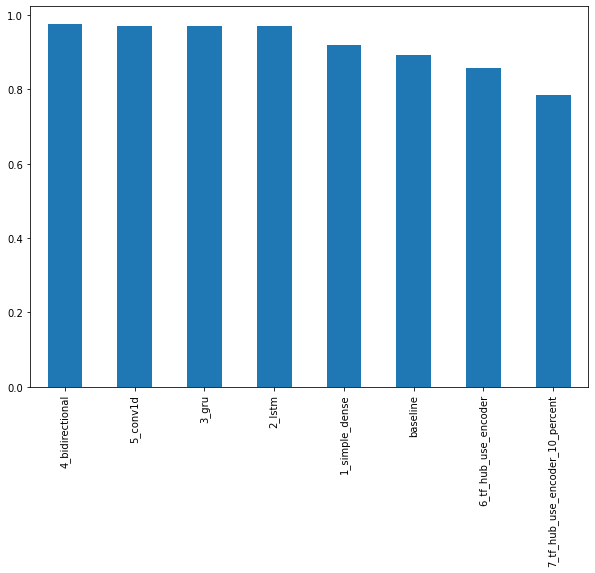

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7))

## Saving and loading a trained model


In [ ]:
# # Save model 1 to HDF5 format
# model_2.save("model_2.h5")


## Predicting on Tweets from the wild

In [ ]:
# Turn Tweet into string
daniels_tweet = "Most Earthquake Damage is Caused by Shaking"

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(Sarcastic)" if pred_label > 0 else "(not Sarcastic)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_2, # use the USE model
                    sentence=daniels_tweet)

Pred: 1.0 (Sarcastic) Prob: 0.9999879598617554
Text:
Most Earthquake Damage is Caused by Shaking
